# Exploratory Data Analysis (EDA) – Retail Sales Dataset

This notebook demonstrates a **complete EDA workflow** using a realistic retail sales dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Load Dataset

In [2]:
df = pd.read_csv('retail_sales.csv')
df.head()

,order_id,order_date,customer_id,country,category,quantity,unit_price,revenue
0,10001,2022-02-23,1102,France,Electronics,2,194.24,388.48
1,10002,2022-11-21,1179,France,Books,2,279.55,559.10
2,10003,2023-04-30,1092,France,Electronics,2,200.44,400.88
3,10004,2021-03-03,1014,UK,Electronics,1,90.21,90.21
4,10005,2024-03-14,1106,Germany,Electronics,2,144.16,288.32


## Dataset Overview

In [3]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   order_id     500 non-null    int64  
 1   order_date   500 non-null    object 
 2   customer_id  500 non-null    int64  
 3   country      500 non-null    object 
 4   category     500 non-null    object 
 5   quantity     500 non-null    int64  
 6   unit_price   500 non-null    float64
 7   revenue      500 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 31.4+ KB


## Summary Statistics

In [4]:
df.describe()

,order_id,customer_id,quantity,unit_price,revenue
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,10250.500000,1101.448000,3.026000,252.833480,769.982120
std,144.481833,57.114301,1.444124,143.614117,619.239748
min,10001.000000,1000.000000,1.000000,10.090000,16.230000
25%,10125.750000,1051.750000,2.000000,124.575000,279.030000
50%,10250.500000,1103.000000,3.000000,253.090000,582.015000
75%,10375.250000,1149.000000,4.000000,376.745000,1182.825000
max,10500.000000,1199.000000,5.000000,498.570000,2478.250000


## Missing Value Analysis

In [5]:
df.isnull().sum()

order_id       0
order_date     0
customer_id    0
country        0
category       0
quantity       0
unit_price     0
revenue        0
dtype: int64

## Date Feature Engineering

In [6]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
df.head()

,order_id,order_date,customer_id,country,category,quantity,unit_price,revenue,year,month
0,10001,2022-02-23,1102,France,Electronics,2,194.24,388.48,2022,2
1,10002,2022-11-21,1179,France,Books,2,279.55,559.10,2022,11
2,10003,2023-04-30,1092,France,Electronics,2,200.44,400.88,2023,4
3,10004,2021-03-03,1014,UK,Electronics,1,90.21,90.21,2021,3
4,10005,2024-03-14,1106,Germany,Electronics,2,144.16,288.32,2024,3


## Revenue Distribution

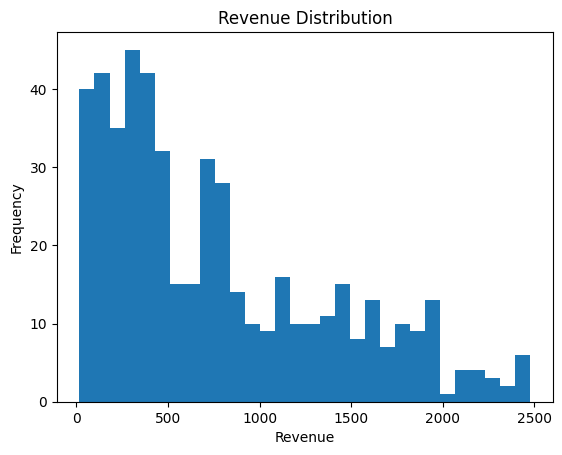

In [7]:
plt.hist(df['revenue'], bins=30)
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title('Revenue Distribution')
plt.show()

## Outlier Detection

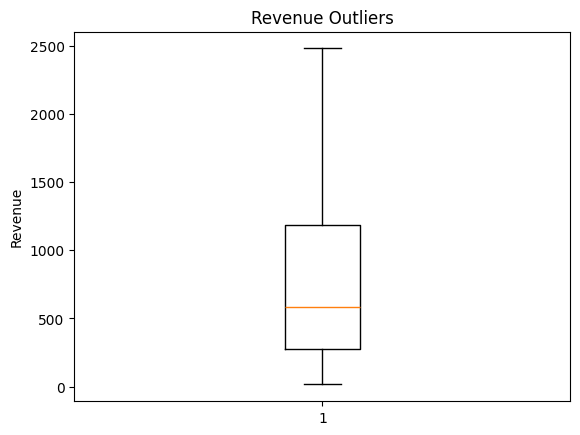

In [8]:
plt.boxplot(df['revenue'])
plt.ylabel('Revenue')
plt.title('Revenue Outliers')
plt.show()

## Revenue by Country

In [9]:
df.groupby('country')['revenue'].sum().sort_values(ascending=False)

country
France     84679.14
Canada     82898.31
USA        75051.23
Germany    72069.34
UK         70293.04
Name: revenue, dtype: float64

## Revenue Trend Over Time

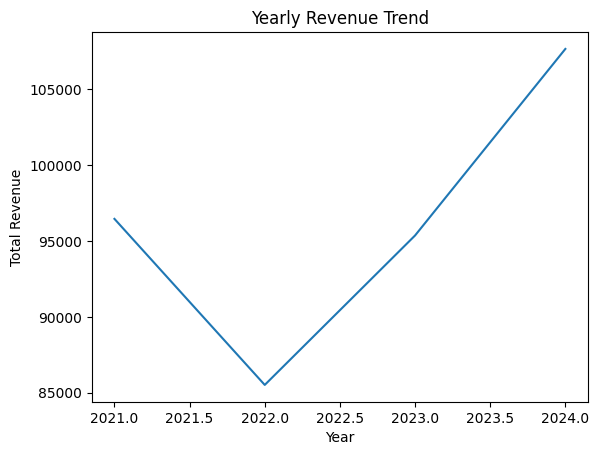

In [10]:
df.groupby('year')['revenue'].sum().plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.title('Yearly Revenue Trend')
plt.show()

## Category-Level Analysis

In [11]:
df.groupby('category')['revenue'].agg(['count', 'mean', 'sum'])

,count,mean,sum
category,,,
Books,105,713.370000,74903.85
Clothing,98,729.552551,71496.15
Electronics,110,771.143818,84825.82
Home,104,911.814231,94828.68
Sports,83,710.079036,58936.56


## Key EDA Findings
- Revenue is right-skewed
- A small number of transactions generate high revenue
- Revenue grows over time
- Category and country differences are significant